In [16]:
run_name = "2017-02-14.11.40.53.407790"

In [17]:
import os
import glob
from functools import reduce

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Client side stats

In [19]:
# read in the data
plot_data_list = []

for i in glob.glob("./results/" + run_name + "/httperf_client_*.csv"):
    plot_data_list.append(pd.read_csv(i, header=0, na_filter=False))

In [20]:
plot_data = pd.DataFrame()

for i in ['Rate', 'Request rate', 'Number of requests',
          'Response status 1xx', 'Response status 2xx', 'Response status 3xx', 
          'Response status 4xx', 'Response status 5xx']:
    plot_data[i] = reduce(lambda x, y: x + y, [plot_data_list[j][i] for j in range(len(plot_data_list))])

plot_data['Response time'] = reduce(lambda x, y: x + y, [plot_data_list[j]['Response time'] 
                                                         for j in range(len(plot_data_list))]) / len(plot_data_list)

plot_data.head()

,Rate,Request rate,Number of requests,Response status 1xx,Response status 2xx,Response status 3xx,Response status 4xx,Response status 5xx,Response time
0,200,200.0,10000,0,10000,0,0,0,1.09
1,400,400.0,10000,0,10000,0,0,0,1.16
2,600,601.0,10000,0,10000,0,0,0,1.22
3,800,572.0,10000,0,7707,0,0,2293,299.95
4,1000,582.1,9735,0,6231,0,0,3487,1025.17


### 1. Request rate

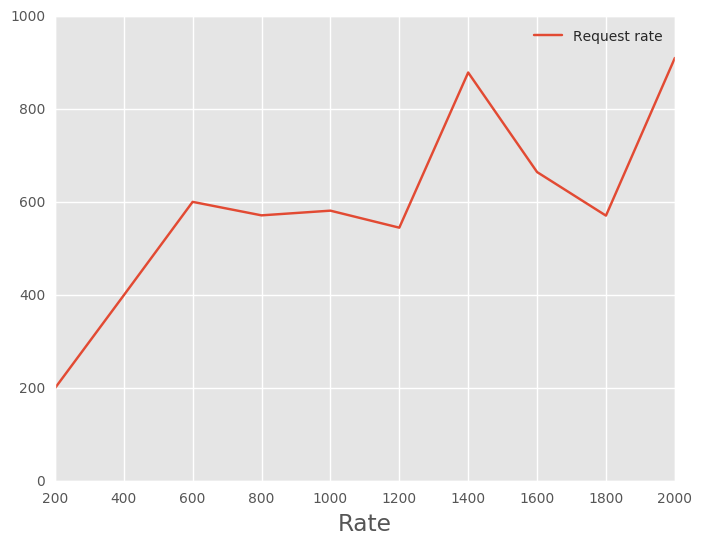

In [21]:
plot_data.plot('Rate', 'Request rate', ylim=(0, None))

In [22]:
plot_data['Rate'].describe()

count      10.000000
mean     1100.000000
std       605.530071
min       200.000000
25%       650.000000
50%      1100.000000
75%      1550.000000
max      2000.000000
Name: Rate, dtype: float64

In [23]:
plot_data['Request rate'].describe()

count     10.000000
mean     592.670000
std      206.261738
min      200.000000
25%      551.975000
50%      577.050000
75%      649.075000
max      910.400000
Name: Request rate, dtype: float64

### 2. Response time

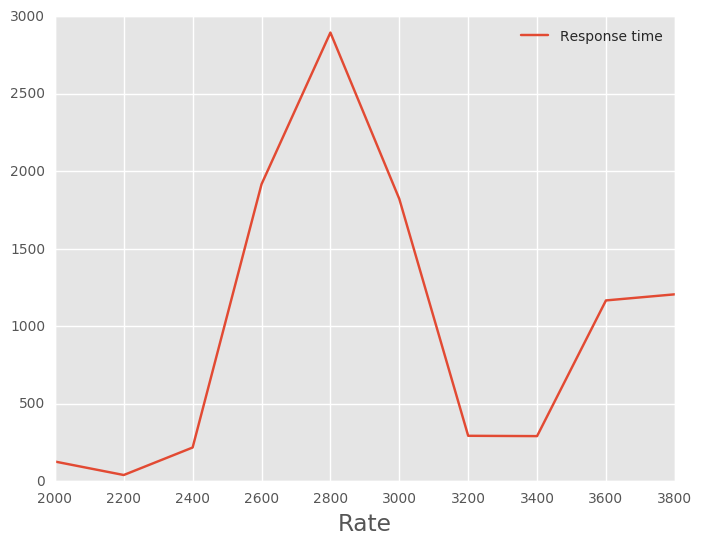

In [15]:
plot_data.plot('Rate', 'Response time', ylim=(0, None))

In [11]:
plot_data['Response time'].describe()

count     50.000000
mean     186.213250
std      147.732167
min        1.200000
25%        7.804688
50%      235.337500
75%      294.385938
max      450.450000
Name: Response time, dtype: float64

### 3. Success rate

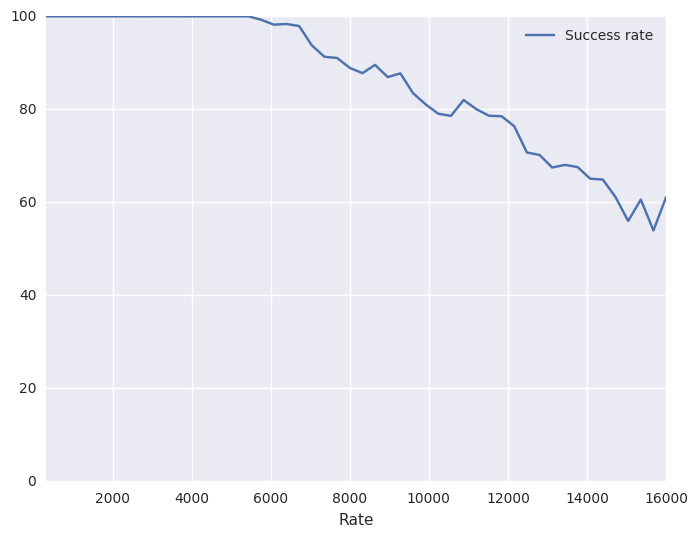

In [12]:
plot_data['Success rate'] = (plot_data['Response status 2xx'] + plot_data['Response status 3xx']) / plot_data['Number of requests'] * 100.0
plot_data.plot('Rate', 'Success rate', ylim=(0, None))

In [13]:
plot_data['Success rate'].describe()

count     50.000000
mean      85.905768
std       14.750354
min       53.953551
25%       76.900874
50%       89.238626
75%      100.000000
max      100.000000
Name: Success rate, dtype: float64

## Server side stats

In [14]:
# read in the stats data
stats_data = pd.read_csv("./results/" + run_name + "/httperf_server_stats.csv", header=0, na_filter=False)
stats_data['Connections Ratio (%)'] = stats_data['Connections'] / sum(stats_data['Connections']) * 100
stats_data['Packets Ratio (%)'] = stats_data['Packets'] / sum(stats_data['Packets']) * 100
stats_data['Bytes Ratio (%)'] = stats_data['Bytes (K)'] / sum(stats_data['Bytes (K)']) * 100
stats_data

,Server,Connections,Packets,Bytes (K),Connections Ratio (%),Packets Ratio (%),Bytes Ratio (%)
0,11.11.11.107:80,14057,1580160,105342,25.000445,24.939484,24.956882
1,11.11.11.106:80,14057,1596139,106347,25.000445,25.191679,25.194979
2,11.11.11.103:80,14057,1574025,104806,25.000445,24.842656,24.829897
3,11.11.11.102:80,14056,1585653,105601,24.998666,25.026180,25.018242
